## Simple Linear Regression

In [332]:
# Importing the libraries
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [333]:
def get_dataset(title):
    return pd.read_csv(title+'.csv')

In [334]:
def data_reshape(data,key):
    return data[key].values.reshape(-1,1)

In [335]:
def data_min_max_norm(data): 
    return MinMaxScaler().fit_transform(data)

In [336]:
dataset=get_dataset(title='Salary_Data')
X_ = data_reshape(data=dataset,key='YearsExperience')
y_ = data_reshape(data=dataset,key='Salary')

In [337]:
X = data_min_max_norm(data=X_)
y = data_min_max_norm(data=y_)

In [338]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [339]:
def poly_features(data,degree=4):
    return PolynomialFeatures(degree = degree).fit_transform(data)

In [340]:
def lin_reg_fit(x,y):
    return LinearRegression().fit(x,y)

In [341]:
def lin_reg_predict(lin_reg_model,data):
    if lin_reg_model!=None:
        return lin_reg_model.predict(data)
    else:
        print('Model is not valid')
        return None

In [342]:
def shape_write(data,title='data'):
    print('{} shape: {}'.format(title,data.shape))

In [404]:
def accuracy_calculater(lin_reg_model,y_data,y_pred):
    print("Coefficients(slope of the line):", lin_reg_model.coef_)
    print("Mean squared error: %.2f"% mean_squared_error(y_data,y_pred))
    print("R-square: %.2f’" % r2_score(y_data,y_pred),end='\n')

In [405]:
def plot_data(lin_reg_model,x_data,y_data,x_title='x data',y_title='y data',color_data='red',color_line='blue'):
    plt.scatter(x_data, y_data, color = color_data)
    plt.plot(x_data, lin_reg_model.predict(x_data), color = color_line)
    plt.title('Fitted Line:  y = %.2f + %.2f * x'% (lin_reg_model.intercept_, lin_reg_model.coef_))
    plt.ylabel(y_title)
    plt.xlabel(x_title)
    plt.show()

In [406]:
def plot_data_poly(lin_reg_model,x_data,y_data,X,x_title='x data',y_title='y data',color_data='red',color_line='blue'):
    X_grid = np.arange(min(X),max(X),((max(X)-min(X))/len(X))).reshape(-1,1)
    plt.scatter(x_data, y_data, color = color_data)
    plt.plot(X_grid, lin_reg_model.predict(poly_features(X_grid)), color = color_line)
    plt.title('Polynomial Regression results')
    plt.ylabel(y_title)
    plt.xlabel(x_title)
    plt.show()

In [407]:
lin_reg_normal = lin_reg_fit(X_train,y_train)
y_pred_normal = lin_reg_predict(lin_reg_normal,X_test)

In [408]:
shape_write(X_train)
shape_write(y_train)

data shape: (20, 1)
data shape: (20, 1)


In [409]:
accuracy_calculater(lin_reg_normal,y_test,y_pred_normal)

Coefficients(slope of the line): [[1.03770209]]
Mean squared error: 0.00
R-square: 0.97’


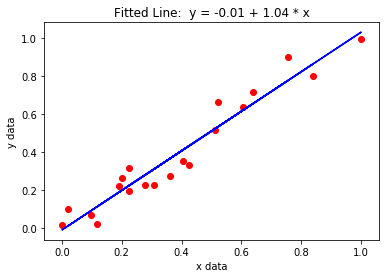

In [410]:
plot_data(lin_reg_normal,X_train,y_train)

In [420]:
X_poly_train = poly_features(data=X_train,degree = 4)
y_poly_train = poly_features(data=y_train,degree = 4)
X_poly_test = poly_features(data=X_test,degree = 4)
y_poly_test = poly_features(data=y_test,degree = 4)

lin_reg_poly = lin_reg_fit(X_poly_train,y_train)

y_pred_poly_train = lin_reg_predict(lin_reg_poly,X_poly_train)
y_pred_poly_test = lin_reg_predict(lin_reg_poly,X_poly_test)

In [421]:
print('Train:')
accuracy_calculater(lin_reg_poly,y_train,y_pred_poly_train)
print('\nTest:')
accuracy_calculater(lin_reg_poly,y_test,y_pred_poly_test)

Train:
Coefficients(slope of the line): [[ 0.          0.51834657  0.70334253  0.81918224 -1.11324768]]
Mean squared error: 0.00
R-square: 0.95’

Test:
Coefficients(slope of the line): [[ 0.          0.51834657  0.70334253  0.81918224 -1.11324768]]
Mean squared error: 0.00
R-square: 0.97’


In [422]:
print('Train:')
shape_write(X_poly_train)
shape_write(y_poly_train)
print('\nTest:')
shape_write(X_poly_test)
shape_write(y_poly_test)

Train:
data shape: (20, 5)
data shape: (20, 5)

Test:
data shape: (10, 5)
data shape: (10, 5)


Train:


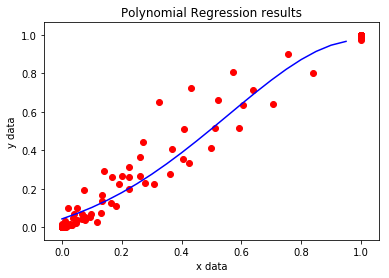

In [423]:
print('Train:')
plot_data_poly(lin_reg_poly,X_poly_train,y_poly_train,X_train)

Test:


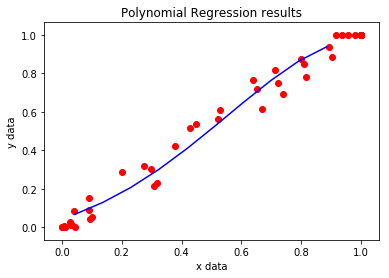

In [424]:
print('Test:')
plot_data_poly(lin_reg_poly,X_poly_test,y_poly_test,X_test)